Used for testing Brio-Wu test


use the sac io library read
a sequence of files and animate

the input file which is read has a sequence of spikes
the initial condition which is read has no density step and is fixed at 1

see https://www.astro.princeton.edu/~jstone/Athena/tests/brio-wu/Brio-Wu.html

for the correct initial conditions

In [60]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import struct

import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline  

In [43]:
#readfunction
def read_sac_bin(filename):
    file = open(filename,'rb')



    file.seek(0,2)
    eof = file.tell()
    file.seek(0,0)

    name = file.read(79)
    nit = fromfile(file,dtype=int32,count=1)
    t = fromfile(file,dtype=float64,count=1)
    ndim=fromfile(file,dtype=int32,count=1)
    neqpar=fromfile(file,dtype=int32,count=1)
    nw=fromfile(file,dtype=int32,count=1)
    #ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
    ndata = fromfile(file,dtype=int32,count=2)
    varbuf = fromfile(file,dtype=float,count=6)[:6]
    varnames = file.read(79)

    #typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;
    datcount=(nw+ndim)*ndata[0]*ndata[1]

    #alldat=fromfile(file,dtype=float,count=datcount)[:(nw+ndim)*ndata[0]*ndata[1]]
    alldat=fromfile(file,dtype=float,count=datcount[0])
    if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]:
        alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1])
    alldat=np.reshape(alldat,(nw[0]+ndim[0],ndata[1],ndata[0],),'C') #the opposite way we think
    #alldat=np.reshape(alldat,(12,256,256),'C')

    file.close()
    
    modelinfo=(name,nit, t, ndim, neqpar, nw,ndata,varbuf,varnames)

    return alldat,modelinfo

In [45]:
#file = open('../../../out/p05/zeroOT_1000.out','rb')

filename='zeroBW_10500.out'
filepath='/media/mike/data/mike/proj/smaug/bw/'+filename
file = open('/media/mike/data/mike/proj/smaug/bw/zeroBW_6000.out','rb')

file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)
nit = fromfile(file,dtype=int32,count=1)
t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)
#ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]
ndata = fromfile(file,dtype=int32,count=2)
varbuf = fromfile(file,dtype=float,count=6)[:6]
varnames = file.read(79)

#typedef enum vars {rho, mom1, mom2, energy, b1, b2,energyb,rhob,b1b,b2b} CEV;
datcount=(nw+ndim)*ndata[0]*ndata[1]

#alldat=fromfile(file,dtype=float,count=datcount)[:(nw+ndim)*ndata[0]*ndata[1]]
alldat=fromfile(file,dtype=float,count=datcount[0])
if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]:
    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1])
alldat=np.reshape(alldat,(nw[0]+ndim[0],ndata[1],ndata[0],),'C')  #the opposite way we think
#alldat=np.reshape(alldat,(12,256,256),'C')

file.close()

In [46]:
print(ndata[0])
print(type(datcount))
print(nw)
print(ndim)

800
<class 'numpy.ndarray'>
[10]
[2]


In [47]:
print ('varnames:',varnames)
print ('nit:',nit)
print ('name:',name)
print ('t:',t)
print ('ndim:',ndim)
print ('neqpar:',neqpar)
print ('nw:',nw)
print ('varbuf:',varbuf)

varnames: b'x y rho mx my e bx by  gamma eta g1 g2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
nit: [6000]
name: b'test1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
t: [0.00295849]
ndim: [2]
neqpar: [6]
nw: [10]
varbuf: [2. 0. 0. 0. 0. 0.]


In [48]:
dens=alldat[2,:,:]
print(np.min(dens))
print(np.max(dens))
print(shape(dens))

0.12300068437531099
1.0000306662284788
(6, 800)


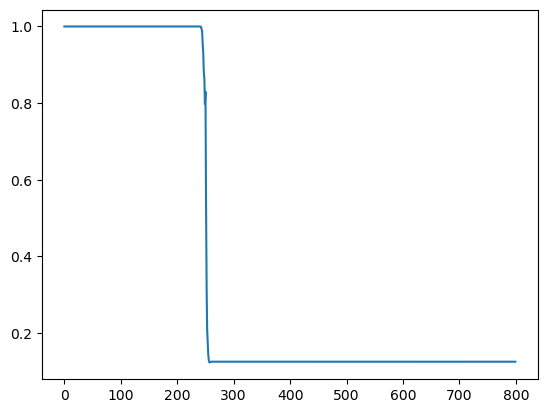

In [50]:
plt.plot(dens[2,:])
plt.show()

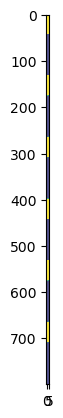

In [9]:
im2 = plt.imshow(dens, cmap=plt.cm.viridis, alpha=.9, interpolation='bilinear',vmin=0.07,vmax=0.352)

plt.show()

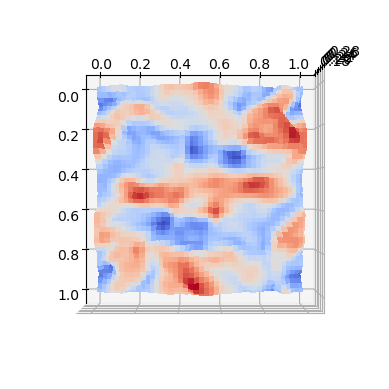

In [134]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = alldat[0,:,:]
Y = alldat[1,:,:]
dens = alldat[2,:,:]


#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, dens, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(elev=90,azim=0) 

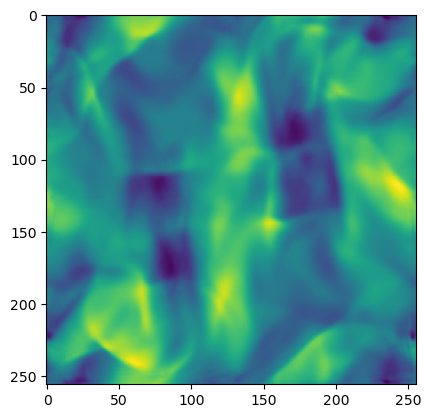

In [135]:
fig, ax = plt.subplots()
ax.imshow(dens)
plt.show()

In [137]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = alldat[0,:,:]
Y = alldat[1,:,:]


dens = alldat[2,:,:]
#bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
#bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, dens, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

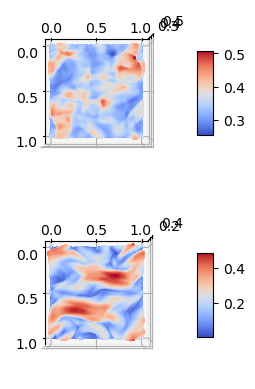

In [138]:
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(2, 1, 1,projection='3d')

#X = alldat[0,:,:]
#Y = alldat[1,:,:]


energy = alldat[5,:,:]
bsq=alldat[6,:,:]*alldat[6,:,:]+alldat[7,:,:]*alldat[7,:,:]
bmag=sqrt(bsq)

surf = ax.plot_surface(X, Y, energy, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)



ax = fig.add_subplot(2, 1, 2,projection='3d')
surf = ax.plot_surface(X, Y, bmag, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Generate a movie of the density evolution

In [88]:
#first read the array of densities
ii=1
Nt=0  #number of time steps

res=[]
for i in range(0,46200,1000):
    Nt=Nt+1
    filename='zeroBW_'+str(i)+'.out'
    filepath='/media/mike/data/mike/proj/smaug/bw/'+filename
    [alldat,moddat]=read_sac_bin(filepath)
    res.append(alldat[2,2,:])

In [89]:
print(Nt)

47


47 0


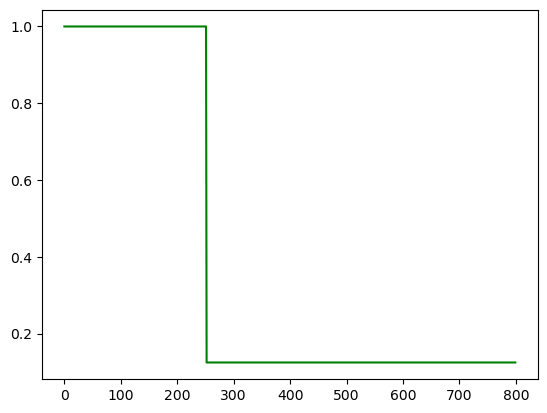

In [90]:
fig, ax = plt.subplots()
ii=0


print(Nt,ii)

line, =ax.plot(res[ii], color='green')

In [91]:
def updatefig(*args):
    global ii
    ii += 1
    if ii >= Nt: return line,
    #im.set_array(lnrho[ii][:][:])
    line.set_ydata(res[ii])  # update the data.
    return line,




ani = animation.FuncAnimation(fig, updatefig, interval=500, frames=Nt)

In [92]:
HTML(ani.to_html5_video())